In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np





db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "shakeel@18",
                            database = "ecommerce")

cur = db.cursor()



## Task 1. List all unique cities where customers are located.

In [7]:
task1 = """ select distinct customer_city from customers"""
cur.execute(task1)
data =cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

In [8]:
df = pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


## Task 2. Count the number of orders placed in 2017.

In [13]:
task2 = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """
cur.execute(task2)
data = cur.fetchall()
"Total orders placed in 2017 are" , data[0][0]

('Total orders placed in 2017 are', 45101)

## Task 3. Find the total sales per category.

In [26]:
query = """ select (products.product_category)  As category, 
round(sum(payments.payment_value),2) as sales
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Category", "Sales"])
df

,Category,Sales
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,bed table bath,1712553.67
4,automotive,852294.33
...,...,...
69,cds music dvds,1199.43
70,La Cuisine,2913.53
71,Fashion Children's Clothing,785.67
72,PC Gamer,2174.43


## Task 4. Calculate the percentage of orders that were paid in installments.

In [33]:
task4 = """ select (sum(case when payment_installments >= 1 then 1
else 0 end))/count(*) * 100 
from payments """
cur.execute(task4)
data = cur.fetchall()
"The percentage of orders ther were paind in installments",data[0][0]


('The percentage of orders ther were paind in installments',
 Decimal('99.9981'))

## Task 5. Count the number of customers from each state. 

In [38]:
task5 = """select customer_state, count(customer_id) from customers
group by customer_state"""

cur.execute(task5)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["State", "Number of Customers"])
df

,State,Number of Customers
0,SP,41746
1,SC,3637
2,MG,11635
3,PR,5045
4,RJ,12852
5,RS,5466
6,PA,975
7,GO,2020
8,ES,2033
9,BA,3380


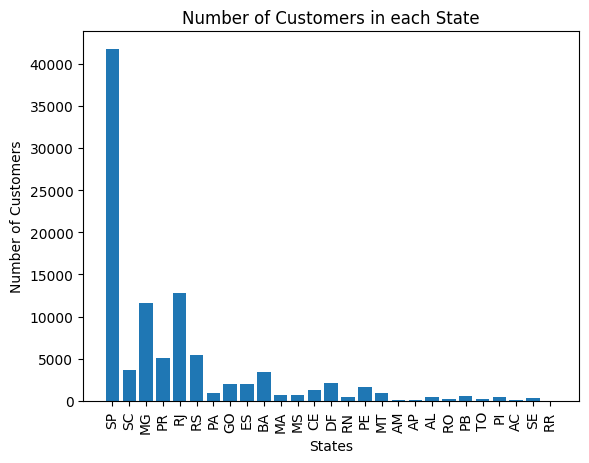

In [ ]:
plt.bar(df["State"], df["Number of Customers"])
plt.xlabel("States")
plt.ylabel("Number of Customers")
plt.title("Number of Customers in each State")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

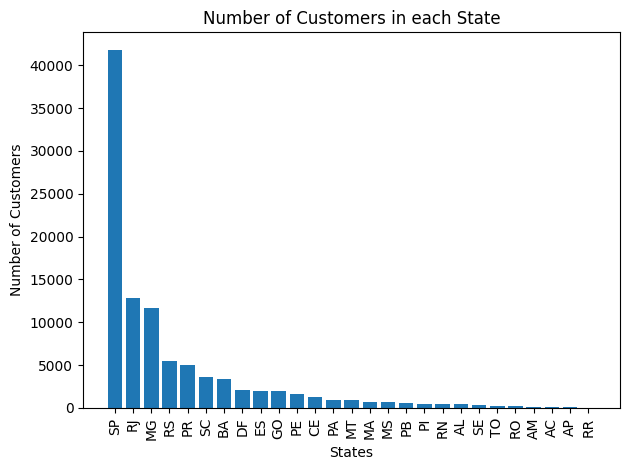

In [45]:
df = df.sort_values(by = "Number of Customers", ascending = False)
plt.bar(df["State"], df["Number of Customers"])
plt.xlabel("States")
plt.ylabel("Number of Customers")
plt.title("Number of Customers in each State")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()


## Task 6. Calculate the number of orders per month in 2018.

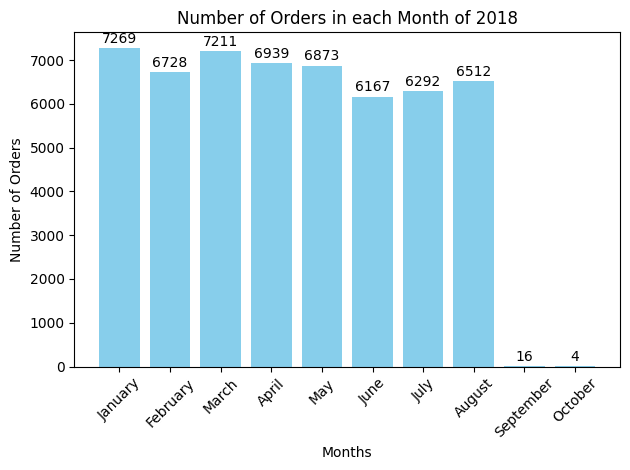

In [ ]:
task_1 = """select monthname(order_purchase_timestamp) as months, count(order_id) as order_count from orders
where year(order_purchase_timestamp) = 2018
group by months
order by order_count desc
"""

cur.execute(task_1)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Months", "Number of Orders"])



# order by months
months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

df["Months"] = pd.Categorical(df["Months"], categories = months_order, ordered = True)
df = df.sort_values("Months")
df

# make a barplot
plt.bar(df["Months"], df["Number of Orders"], color = "skyblue")
plt.xlabel("Months")
plt.ylabel("Number of Orders")
plt.title("Number of Orders in each Month of 2018")
plt.xticks(rotation = 45)

# also add the value on top of each bar
for i, v in enumerate(df["Number of Orders"]):
    plt.text(i, v + 50, str(v), ha = "center", va = "bottom")

plt.tight_layout()
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7748\276091200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Months", y = "Number of Orders", data = df, palette = "viridis")


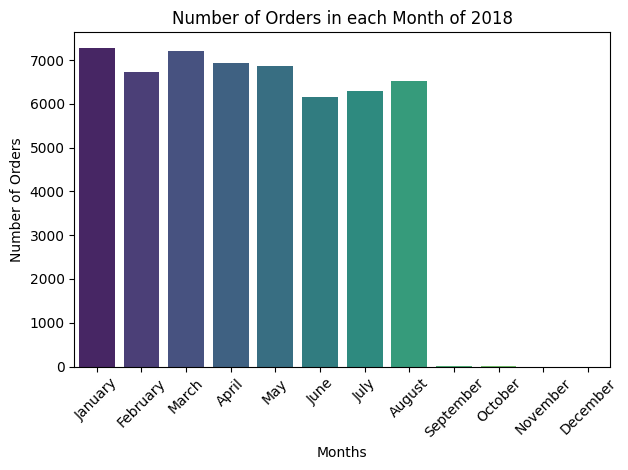

In [70]:
# use seaborn to make a barplot
sns.barplot(x = "Months", y = "Number of Orders", data = df, palette = "viridis")
plt.xlabel("Months")
plt.ylabel("Number of Orders")
plt.title("Number of Orders in each Month of 2018")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## Task 7. Find the average number of products per order, grouped by customer city.

In [3]:

query = """SELECT 
    c.customer_city,
    AVG(order_product_count) AS avg_products_per_order
FROM (
    SELECT 
        o.order_id,
        o.customer_id,
        COUNT(oi.product_id) AS order_product_count
    FROM orders o
    JOIN order_items oi ON o.order_id = oi.order_id
    GROUP BY o.order_id, o.customer_id
) AS order_counts
JOIN customers c ON order_counts.customer_id = c.customer_id
GROUP BY c.customer_city
ORDER BY avg_products_per_order DESC;

"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns = ["customer city", "average products/order"])
df.head(10)

,customer city,average products/order
0,padre carvalho,7.0000
1,celso ramos,6.5000
2,datas,6.0000
3,candido godoi,6.0000
4,matias olimpio,5.0000
5,cidelandia,4.0000
6,picarra,4.0000
7,morro de sao paulo,4.0000
8,teixeira soares,4.0000
9,curralinho,4.0000


## Task 8. Calculate the percentage of total revenue contributed by each product category.

In [4]:
query = """select upper(products.product_category) category, 
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc"""


cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "percentage distribution"])
df

,Category,percentage distribution
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
...,...,...
69,HOUSE COMFORT 2,0.01
70,CDS MUSIC DVDS,0.01
71,PC GAMER,0.01
72,FASHION CHILDREN'S CLOTHING,0.00


## Task 9. Identify the correlation between product price and the number of times a product has been purchased.

In [77]:

cur = db.cursor()
query = """select products.product_category, 
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "order_count","price"])

arr1 = df["order_count"]
arr2 = df["price"]

a = np.corrcoef([arr1,arr2])
print("the correlation is", a[0][-1])

the correlation is -0.10631514167157562


## Task 10. Calculate the total revenue generated by each seller, and rank them by revenue.

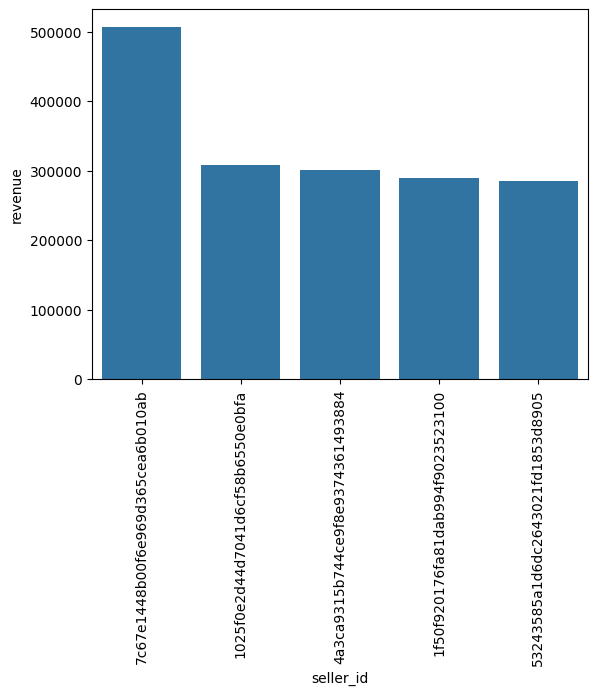

In [79]:
query = """ select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])
df = df.head()
sns.barplot(x = "seller_id", y = "revenue", data = df)
plt.xticks(rotation = 90)
plt.show()

## Task 11. Calculate the moving average of order values for each customer over their order history.

In [80]:
query = """select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, 
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df



,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


## Task 12. Calculate the cumulative sales per month for each year.

In [82]:
query = """select years, months , payment, sum(payment)
over(order by years, months) cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df



,0,1,2,3
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


## Task 13. Calculate the year-over-year growth rate of total sales.

In [83]:
query = """with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, ((payment - lag(payment, 1) over(order by years))/
lag(payment, 1) over(order by years)) * 100 from a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "yoy % growth"])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


## Task 14. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [84]:
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;"""

cur.execute(query)
data = cur.fetchall()

data

[(None,)]

## Task 15. Identify the top 3 customers who spent the most money in each year.

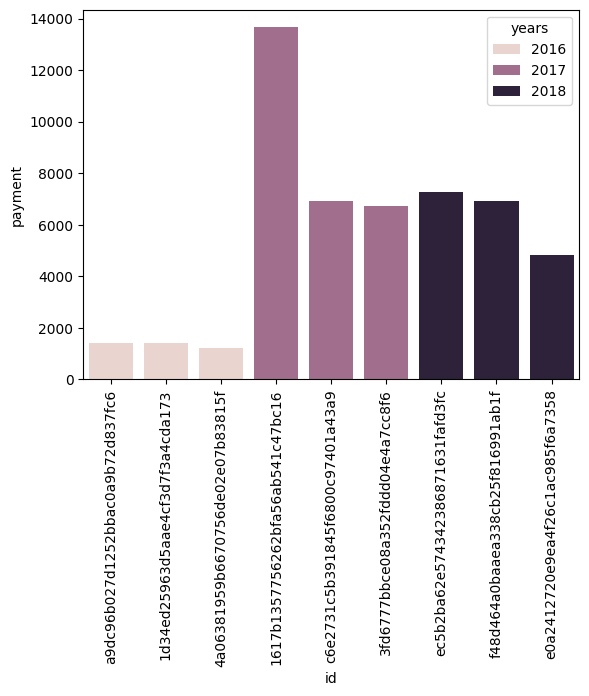

In [85]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()

## Project completed successfully